In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn. neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib


categorical_columns=['protocol_type', 'service', 'flag']
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv('static/Files/NSL-KDD 2/train_data.csv', header=None, names=col_names)

df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,214,14939,0,0,0,0,...,255,1.00,0.00,0.02,0.06,0.0,0.0,0.0,0.0,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune
2,0,tcp,http,REJ,0,0,0,0,0,0,...,8,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
3,0,tcp,http,SF,257,259,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal
4,0,udp,other,SF,516,4,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,normal


In [25]:
# Step 2: Preprocess the Data
# Separate features (X) and labels (y)
X = df.drop(columns=["label"])  # Replace "target" with your target column name
y = df["label"]

# Encode categorical columns in X if any
X = pd.get_dummies(X)
X_columns = X.columns



# Encode target labels (Normal/Anomaly)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


X_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
980,0,296,1645,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
87691,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
46609,0,320,10908,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
92174,0,12,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
45699,0,956,302,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
modelRFC = RandomForestClassifier(n_estimators=100, random_state=42)
modelRFC.fit(X_train, y_train)

modelDTC = DecisionTreeClassifier(random_state=42)
modelDTC.fit(X_train, y_train)

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

modelGNB = GaussianNB ()
modelGNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Step 4: Evaluate the Model random forest
y_predRFC = modelRFC.predict(X_test)
accuracy = accuracy_score(y_test, y_predRFC)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 99.84%


In [9]:
# Step 4: Evaluate the Model
y_predDTC = modelDTC.predict(X_test)
accuracy = accuracy_score(y_test, y_predDTC)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 99.73%


In [10]:
# Step 4: Evaluate the Model
y_predKNN = modelKNN.predict(X_test)
accuracy = accuracy_score(y_test, y_predKNN)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 98.33%


In [11]:
# Step 4: Evaluate the Model
y_predGNB = modelGNB.predict(X_test)
accuracy = accuracy_score(y_test, y_predGNB)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 41.52%


In [ ]:
# Step 5: Save the Model
joblib.dump(modelRFC, "model/IDS-model_Random-Forest.joblib")
print("Model saved as 'IDS-model_Random-Forest.joblib'")

# Step 5: Save the Model
joblib.dump(modelDTC, "model/IDS-model_Decision-Tree.joblib")
print("Model saved as 'IDS-model_Decision-Tree.joblib'")

# Step 5: Save the Model
joblib.dump(modelKNN, "model/IDS-model_KNN.joblib")
print("Model saved as 'IDS-model_KNN.joblib'")

# Step 5: Save the Model
joblib.dump(modelGNB, "model/IDS-model_Gaussian.joblib")
print("Model saved as 'IDS-model_Gaussian.joblib'")

In [26]:
new_data = pd.read_csv('dataset.csv', header=None, names=col_names)


new_data = pd.get_dummies(new_data)
new_data = new_data.reindex(columns = X_columns, fill_value=0)

# Align the columns of new_data to match the trained model's features

new_data.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [40]:
new_data = pd.get_dummies(new_data)


new_data.head(5)
new_data.columns = new_data.columns.astype(str)
predictions = modelDTC.predict(new_data)
predictions1 = modelKNN.predict(new_data)
print(predictions)


[ 9  9 11 ...  0 11 17]


{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(20), np.int64(21)}


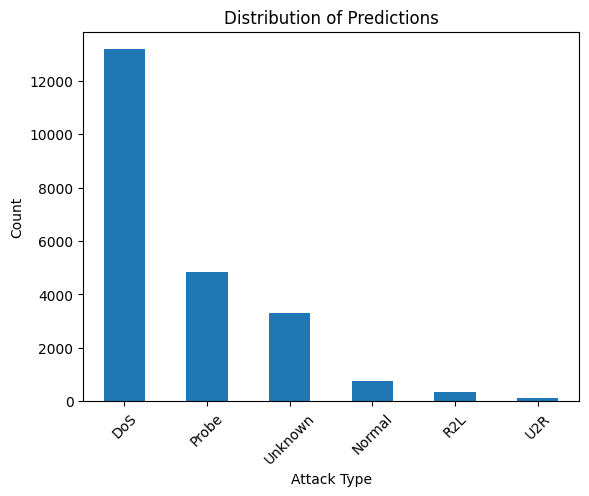

In [39]:
import matplotlib.pyplot as plt

label_mapping = {
    0: "Normal",
    1: "DoS",
    2: "R2L",
    3: "U2R",
    4: "Probe",
    5: "DoS",
    6: "U2R",
    7: "R2L",
    8: "DoS",
    9: "Probe",
    10: "R2L",
    11: "DoS"
}

print(set(predictions))
# Assuming `predictions` is your array of predicted labels
predicted_labels = [label_mapping.get(pred, "Unknown") for pred in predictions]
# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Predicted Label': predicted_labels
})

# Count the occurrences of each label
label_counts = results_df['Predicted Label'].value_counts()

# Plotting the distribution of predictions
label_counts.plot(kind='bar', title='Distribution of Predictions')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

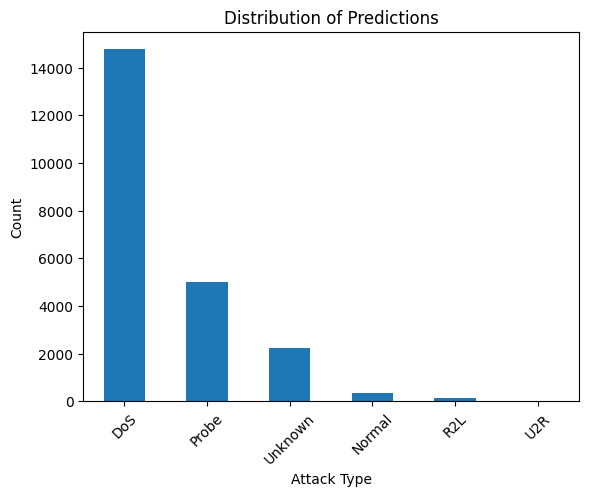

In [41]:
 #Assuming `predictions` is your array of predicted labels
predicted_labels = [label_mapping.get(pred, "Unknown") for pred in predictions1]
# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Predicted Label': predicted_labels
})

# Count the occurrences of each label
label_counts = results_df['Predicted Label'].value_counts()

# Plotting the distribution of predictions
label_counts.plot(kind='bar', title='Distribution of Predictions')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()